In [27]:
import math
import statistics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
from scipy.stats import norm 
from matplotlib.patches import Rectangle 
from math import cos, sin
from collections import defaultdict

In [9]:
data = "31Trials.csv"
cls = ["TrackingStamp", "TimeStamp", "X", "Y", "Angle", "PosterNumber", "TrialStamp"]
df = pd.read_csv(data, skiprows=53, names=cls)

posters = [
    (1, "Cat"), 
    (2, "Rabbit"), 
    (3,"Fox"), 
    (4, "Hippo"), 
    (5, "Crocodile"), 
    (6, "Pig")
    ]
dfs = []
index = df.index[df['TrialStamp'] == 1].tolist() 
index = [0] + index + [len(df)]
for i in range(len(index) - 1):
    starting_index = index[i]
    ending_index = index[i+1]
    new_df = df.iloc[starting_index:ending_index]
    dfs.append(new_df)
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:\n{df}\n")
if dfs:
    dfs.pop(0)
print(dfs)


DataFrame 1:
    TrackingStamp  TimeStamp     X    Y  Angle  PosterNumber  TrialStamp
0               0   0.048095 -7.07 -4.8    0.0             0           0
1               0   0.020000 -7.07 -4.8    0.0             0           0
2               0   0.038220 -7.07 -4.8    0.0             0           0
3               0   0.033621 -7.07 -4.8    0.0             0           0
4               0   0.032820 -7.07 -4.8    0.0             0           0
5               0   0.033374 -7.07 -4.8    0.0             0           0
6               0   0.033233 -7.07 -4.8    0.0             0           0
7               0   0.032892 -7.07 -4.8    0.0             0           0
8               0   0.047597 -7.07 -4.8    0.0             0           0
9               0   0.037754 -7.07 -4.8    0.0             0           0
10              0   0.012486 -7.07 -4.8    0.0             0           0
11              0   0.032795 -7.07 -4.8    0.0             0           0
12              0   0.040013 -7.07 -4.

In [25]:
all_poster_numbers = []

for df_idx, df in enumerate(dfs, start=1):    
    printed_poster_numbers = set()   
    poster_numbers = df['PosterNumber'] 
    for index, poster_number in poster_numbers.items():
        if poster_number != 0 and poster_number not in printed_poster_numbers:
            print(f"{poster_number}")
            all_poster_numbers.append(poster_number)
            printed_poster_numbers.add(poster_number)
            
paths = [(1,2), (1,3), (1,4), (1,5), (1,6),
(2,1), (2,3), (2,4), (2,5), (2,6),
(3,1), (3,2), (3,4), (3,5), (3,6),
(4,1), (4,2), (4,3), (4,5), (4,6),
(5,1), (5,2), (5,3), (5,4), (5,6),
(6,1), (6,2), (6,3), (6,4), (6,5)]

print(all_poster_numbers)

4
5
1
6
3
4
2
3
6
2
1
5
6
1
2
4
1
3
2
5
3
1
4
6
5
2
6
4
3
5
4
[4, 5, 1, 6, 3, 4, 2, 3, 6, 2, 1, 5, 6, 1, 2, 4, 1, 3, 2, 5, 3, 1, 4, 6, 5, 2, 6, 4, 3, 5, 4]


In [28]:
pair_counts = defaultdict(int)

for i in range(len(all_poster_numbers) - 1):
    pair = (all_poster_numbers[i], all_poster_numbers[i + 1])
    if pair in paths:
        pair_counts[pair] += 1

for path in paths:
    if path in pair_counts:
        print(f"{path}: {pair_counts[path]}")
    else:
        print(f"{path}: 0")

(1, 2): 1
(1, 3): 1
(1, 4): 1
(1, 5): 1
(1, 6): 1
(2, 1): 1
(2, 3): 1
(2, 4): 1
(2, 5): 1
(2, 6): 1
(3, 1): 1
(3, 2): 1
(3, 4): 1
(3, 5): 1
(3, 6): 1
(4, 1): 1
(4, 2): 1
(4, 3): 1
(4, 5): 1
(4, 6): 1
(5, 1): 1
(5, 2): 1
(5, 3): 1
(5, 4): 1
(5, 6): 1
(6, 1): 1
(6, 2): 1
(6, 3): 1
(6, 4): 1
(6, 5): 1


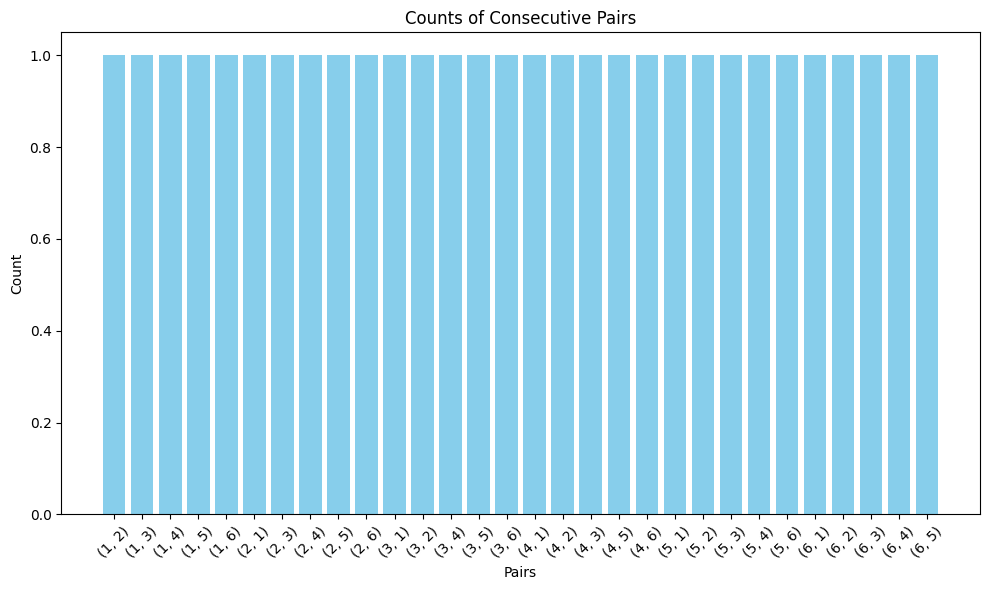

In [30]:
pairs = [str(path) for path in paths]
counts = [pair_counts[path] if path in pair_counts else 0 for path in paths]

plt.figure(figsize=(10, 6))
plt.bar(pairs, counts, color='skyblue')
plt.xlabel('Pairs')
plt.ylabel('Count')
plt.title('Counts of Consecutive Pairs')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()